## Importing the libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)


## Data collection

In [3]:
df = pd.read_csv('bangluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

## Data preprocessing

In [5]:
df = df.drop(columns=['area_type','availability','society','balcony'],axis=1)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df.shape

(13320, 5)

In [7]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.shape

(13246, 5)

## Feature Engineering

In [10]:
df['bhk'] = df['size'].apply(lambda x : int(x.split(' ')[0]))

In [11]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [12]:
def isfloat( x ):
    try:
        float(x)
    except:
        return False
    return True

In [13]:
df[~df['total_sqft'].apply(isfloat)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [14]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
           return (float(tokens[0]) + float(tokens[1]))/2
    try:
          return float(x)
    except:
          return None

In [15]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)

In [16]:
df.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [17]:
df = df.dropna()

In [18]:
df.shape

(13200, 6)

In [19]:
df.sample(10)

,location,size,total_sqft,bath,price,bhk
5554,ISRO Layout,3 BHK,1310.0,2.0,68.00,3
8668,Gattahalli,3 BHK,1240.0,2.0,63.00,3
5621,Kadugodi,3 BHK,1762.0,3.0,112.00,3
453,Thippasandra,4 Bedroom,1200.0,4.0,200.00,4
11577,Varsova Layout,6 Bedroom,7000.0,6.0,560.00,6
3148,Hosa Road,3 BHK,1332.0,2.0,86.12,3
11786,Bannerghatta Road,3 BHK,1400.0,3.0,69.00,3
4912,Hosahalli Extension,9 Bedroom,750.0,6.0,112.00,9
12385,Old Airport Road,4 BHK,3504.0,4.0,262.00,4
6132,Electronic City,2 BHK,1125.0,2.0,32.50,2


In [20]:
df['price_per_sqft'] = (df['price']*100000)/df['total_sqft']

In [21]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [22]:
df.location = df.location.apply(lambda x: x.strip())
location_stats = df['location'].value_counts(ascending=False)

In [23]:
len(location_stats[location_stats>10])

240

## DImensionality Reduction

In [24]:
location_stats_less_than_10 = location_stats[location_stats<=10]
df.location = df.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [25]:
len(df.location.unique())

241

In [26]:
df.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9161,Yelahanka,2 BHK,1023.00,2.0,52.59,2,5140.762463
9843,Banaswadi,2 BHK,1340.00,2.0,73.00,2,5447.761194
7295,Electronic City Phase II,3 BHK,1252.00,2.0,65.00,3,5191.693291
13089,Malleshwaram,4 BHK,2610.00,4.0,306.00,4,11724.137931
11943,Hegde Nagar,3 BHK,2162.03,4.0,129.00,3,5966.614709
10137,other,1 Bedroom,600.00,1.0,20.00,1,3333.333333
1401,Raja Rajeshwari Nagar,2 BHK,1105.00,2.0,65.00,2,5882.352941
3420,Kanakpura Road,2 BHK,1339.00,2.0,62.00,2,4630.321135
2946,other,2 Bedroom,1300.00,2.0,54.00,2,4153.846154
10045,other,2 BHK,1100.00,2.0,57.60,2,5236.363636


## Outlier Removal Using Business Logic

In [27]:
df = df[~(df['total_sqft']/df['bhk']<300)]

In [28]:
df.shape

(12456, 7)

In [29]:
df.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

## Outlier Removal Using Standard Deviation and Mean

In [30]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df],ignore_index=True)
    return df_out
df = remove_pps_outliers(df)

In [31]:
df.shape

(10242, 7)

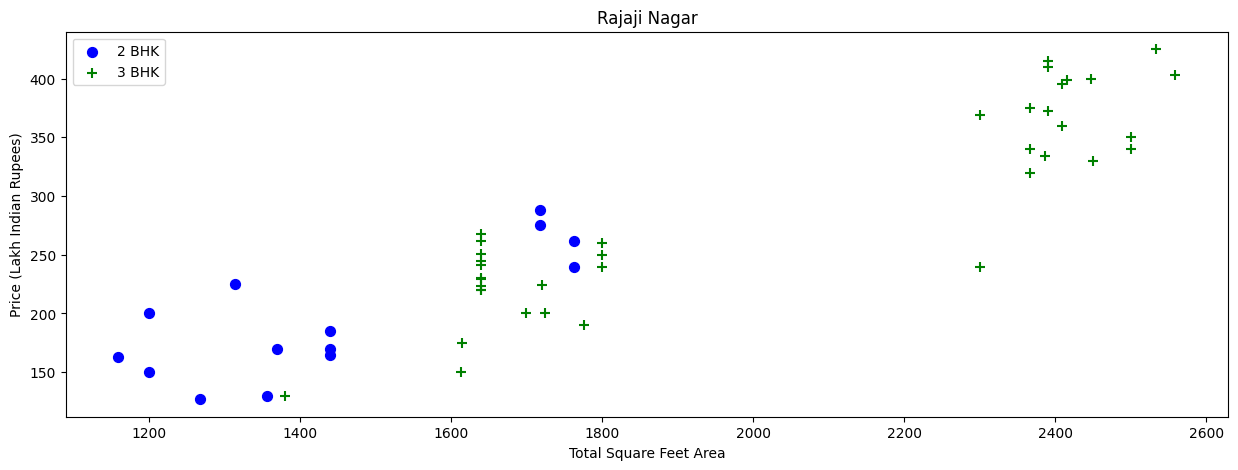

In [32]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,5)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df,"Rajaji Nagar")

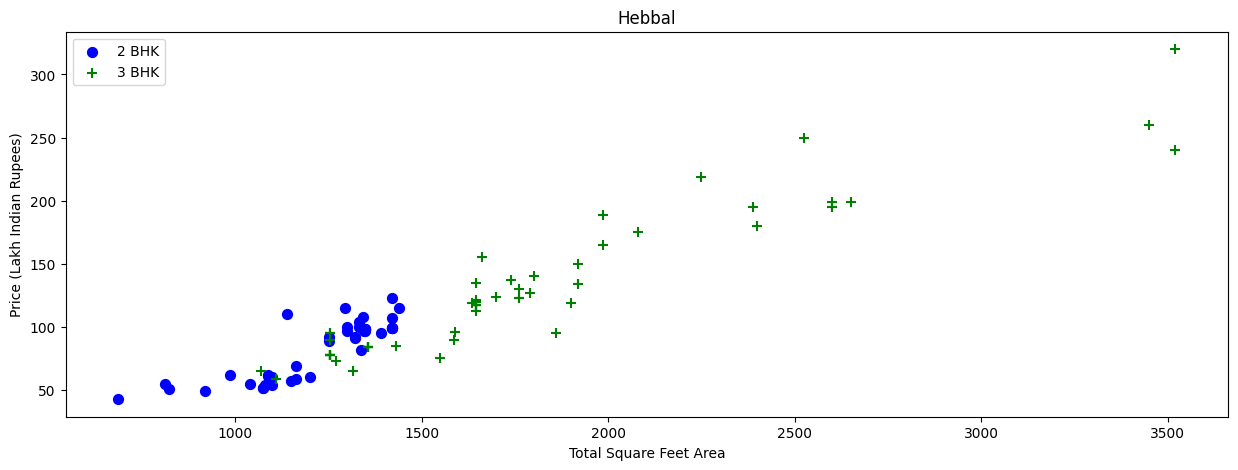

In [33]:
plot_scatter_chart(df,"Hebbal")

In [34]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df = remove_bhk_outliers(df)
df.shape

(7317, 7)

In [35]:
df.shape

(7317, 7)

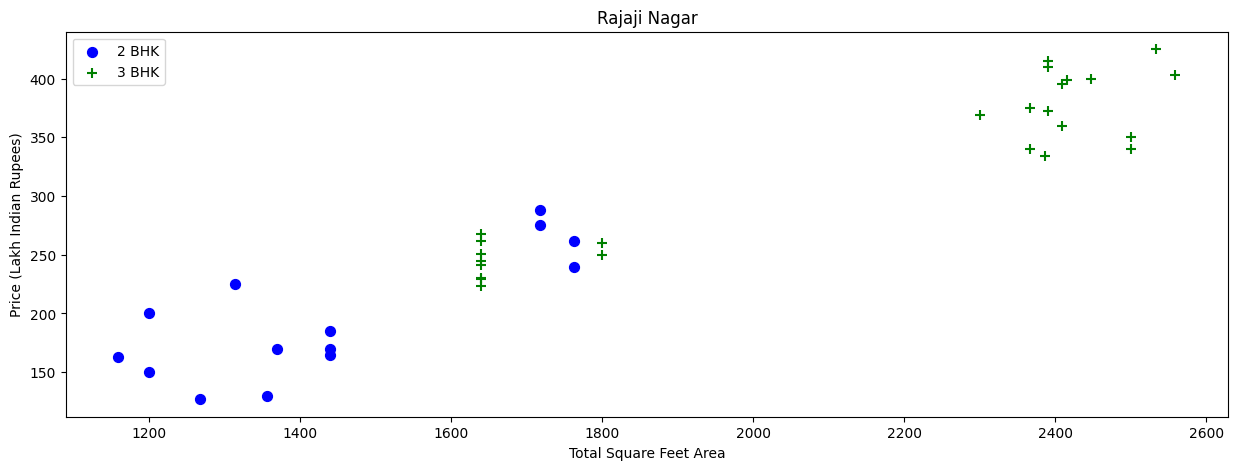

In [36]:
plot_scatter_chart(df,"Rajaji Nagar")

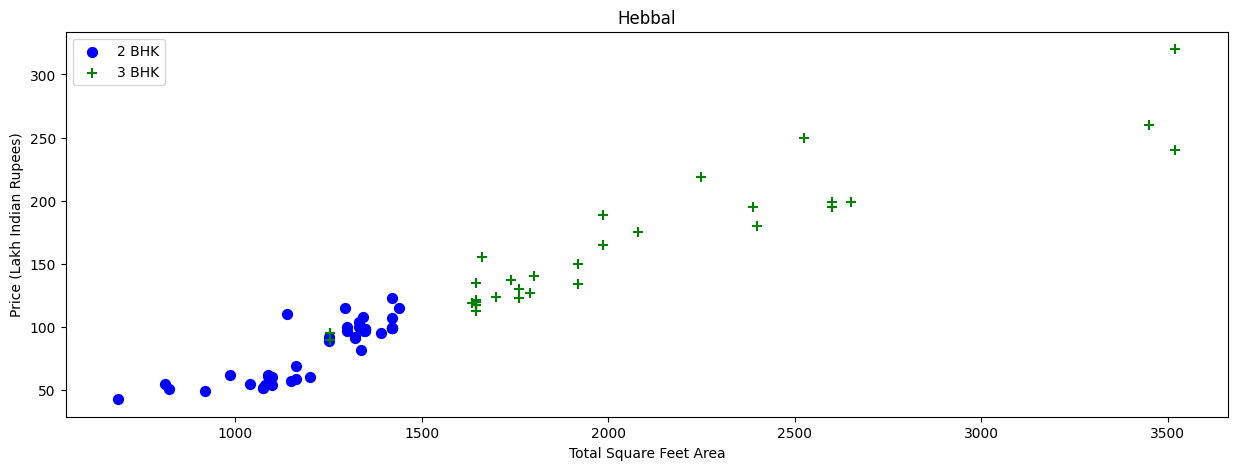

In [37]:
plot_scatter_chart(df,"Hebbal")

Text(0, 0.5, 'Count')

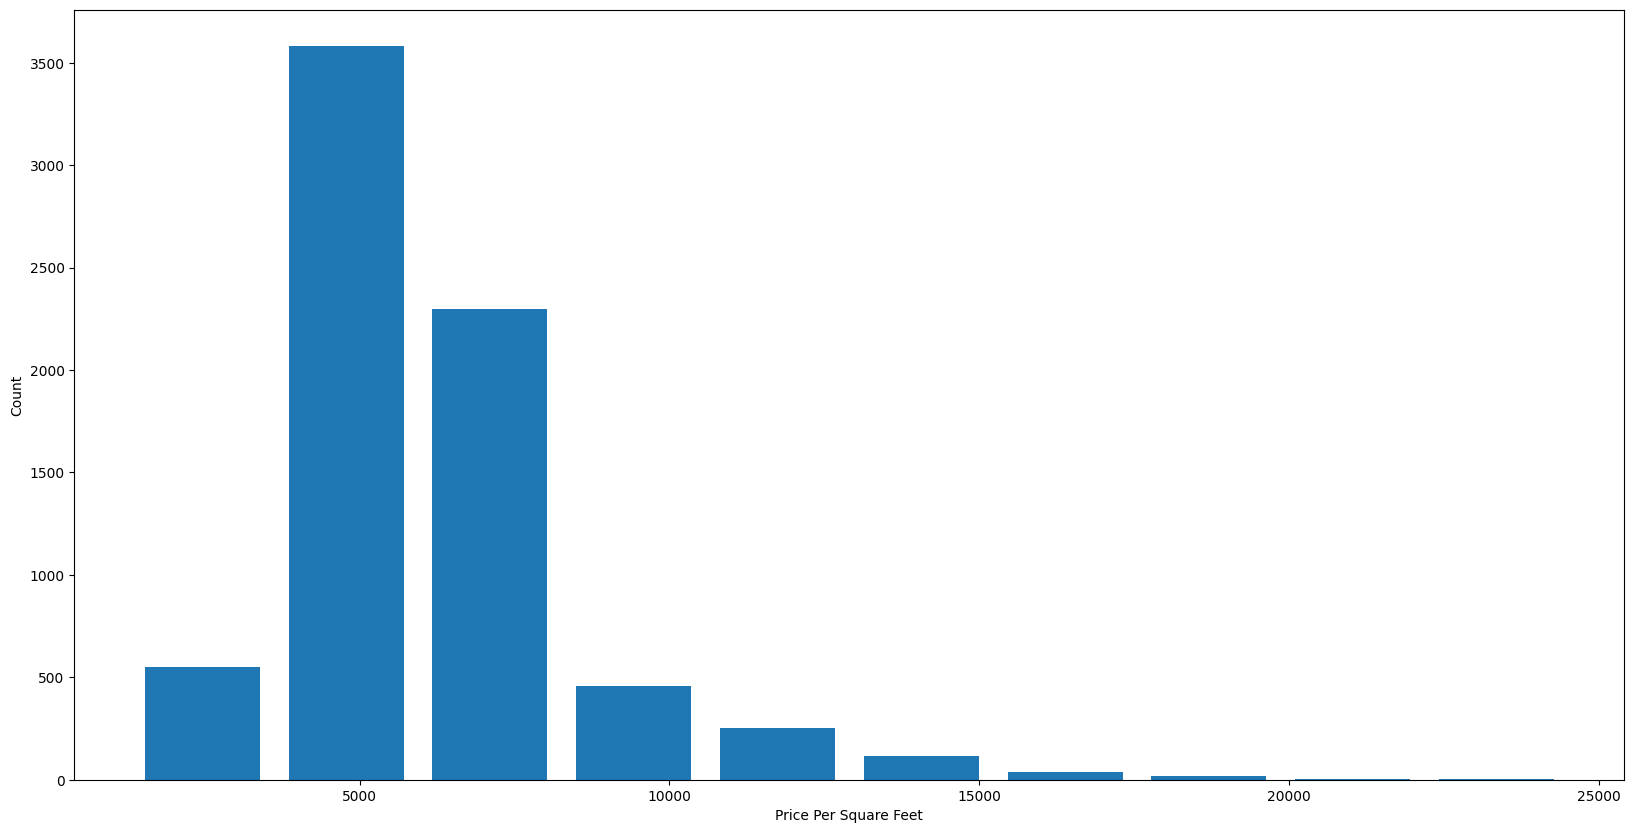

In [38]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

## Outlier Removal Using Bathrooms Feature

In [39]:
df.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

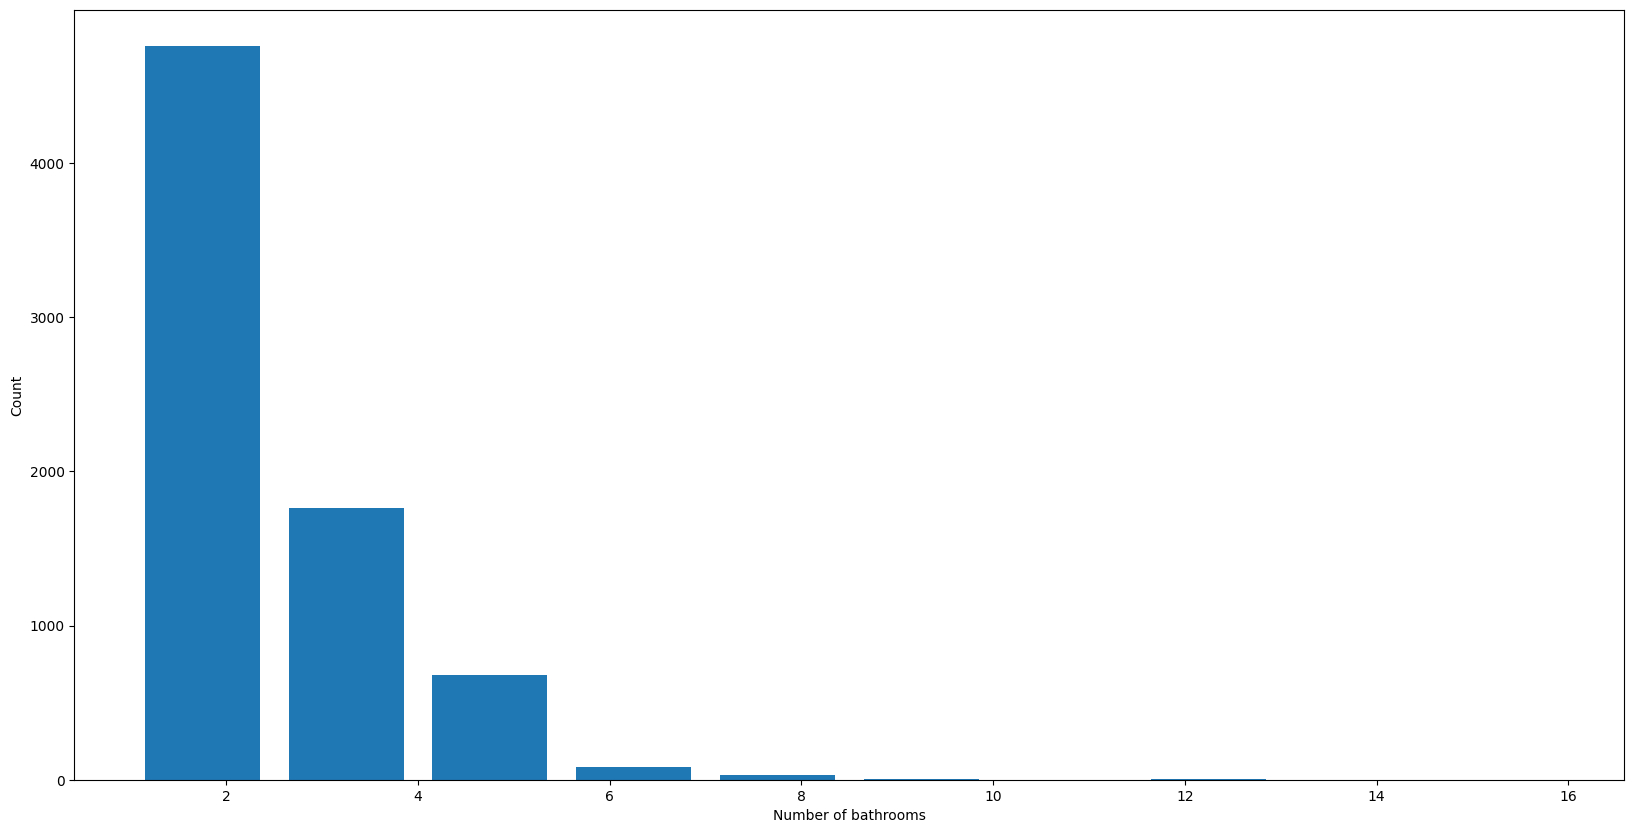

In [40]:
plt.hist(df.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [41]:
df[df.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [42]:
df = df[df.bath<df.bhk+2]

In [43]:
df.shape

(7239, 7)

In [44]:
df = df.drop(['size','price_per_sqft'],axis='columns')
df.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


## Use One Hot Encoding For Location

In [45]:
dummies = pd.get_dummies(df.location,dtype=int)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df = pd.concat([df,dummies.drop('other',axis='columns')],axis='columns')
df.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df = df.drop('location',axis='columns')
df.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df.shape

(7239, 244)

In [49]:
X = df.drop(['price'],axis='columns')
y = df.price

In [50]:
X.shape,y.shape

((7239, 243), (7239,))

## Finding the best Model

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [53]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [54]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Adaboost Regressor":AdaBoostRegressor(),
    "Graident BoostRegressor":GradientBoostingRegressor(),
    "Xgboost Regressor":XGBRegressor()
   
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 35.0583
- Mean Absolute Error: 17.2743
- R2 Score: 0.8523
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 26.6656
- Mean Absolute Error: 16.1554
- R2 Score: 0.8629


Lasso
Model performance for Training set
- Root Mean Squared Error: 48.9899
- Mean Absolute Error: 24.8731
- R2 Score: 0.7116
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 38.2128
- Mean Absolute Error: 23.1578
- R2 Score: 0.7185


Ridge
Model performance for Training set
- Root Mean Squared Error: 35.2695
- Mean Absolute Error: 17.1960
- R2 Score: 0.8505
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 27.0702
- Mean Absolute Error: 16.0750
- R2 Score: 0.8587


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 43.1530
- Mean Absolute Error: 19.5154
- R2 Score: 0.7762
---------

## Hyperparameter tuning using RandomizedSearchCV

In [55]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2],
}

random_search = RandomizedSearchCV(estimator=XGBRegressor(),
                                   param_distributions=param_distributions,
                                   cv=3,
                                   scoring='neg_mean_squared_error',
                                   n_iter=10,
                                   verbose=1,
                                   random_state=42,
                                   n_jobs=-1)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300],
                                        'reg_alpha': [0, 0.1, 0.5],
                                        'reg_lambda': [1, 1.5, 2],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [56]:
random_search.best_params_

{'subsample': 1.0,
 'reg_lambda': 1.5,
 'reg_alpha': 0.5,
 'n_estimators': 200,
 'max_depth': 5,
 'learning_rate': 0.3,
 'gamma': 0,
 'colsample_bytree': 0.6}

In [57]:
model = XGBRegressor(subsample= 1.0,
                    reg_lambda= 1.5,
                    reg_alpha= 0.5,
                    n_estimators= 200,
                    max_depth= 5,
                    learning_rate= 0.3,
                    gamma= 0,
                    colsample_bytree= 0.6)

model.fit(X_train,y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
print('Best Model Evalueation :')
    
print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print("- R2 Score: {:.4f}".format(model_train_r2))

print('----------------------------------')
    
print('Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format(model_test_r2))

Best Model Evalueation :
Model performance for Training set
- Root Mean Squared Error: 22.8706
- Mean Absolute Error: 12.8729
- R2 Score: 0.9371
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 27.2167
- Mean Absolute Error: 14.8570
- R2 Score: 0.8572


## Export the tested model to a pickle file

In [58]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(model,f)

### Export location and column information to a file that will be useful later on in our prediction application

In [59]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))